In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.0 MB/s eta 0:00:00a 0:00:01


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
import time

In [12]:
# Load the California Housing dataset
data = fetch_california_housing()
X,y = data.data,data.target

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [6]:
X.shape,y.shape

((20640, 8), (20640,))

In [11]:
len(list(set(y)))

3842

The dataset has 20640 samples and 8 features

## Initialize Models

In [13]:
n_estimators = 100
rf = RandomForestRegressor(n_estimators=n_estimators,random_state=42)
xgb = XGBRegressor(n_estimators = n_estimators, random_state=42)

In [14]:
# fit models
# calculating time
start_time_rf = time.time()
rf.fit(X_train,y_train)
end_time_rf = time.time()
time_duration = end_time_rf-start_time_rf
print(f"Random Forrest training time: {time_duration}")

start_time_xgb = time.time()
xgb.fit(X_train,y_train)
end_time_xgb = time.time()
time_duration_xgb = end_time_xgb-start_time_xgb
print(f"XGBoost training time: {time_duration_xgb}")

Random Forrest training time: 13.521549701690674
XGBoost training time: 0.48430800437927246


In [15]:
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf-start_time_rf

# Measure prediction time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb-start_time_xgb

print(f"RandomForest Predict Time: {rf_pred_time}")
print(f"XGBoost predict time:{xgb_pred_time}")


RandomForest Predict Time: 0.5736801624298096
XGBoost predict time:0.02403116226196289


In [16]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test,y_pred_rf)
r2_xgb = r2_score(y_test,y_pred_rf)

In [17]:
print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'XGBoost: MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

Random Forest:  MSE = 0.2557, R^2 = 0.8049
XGBoost: MSE = 0.2226, R^2 = 0.8049


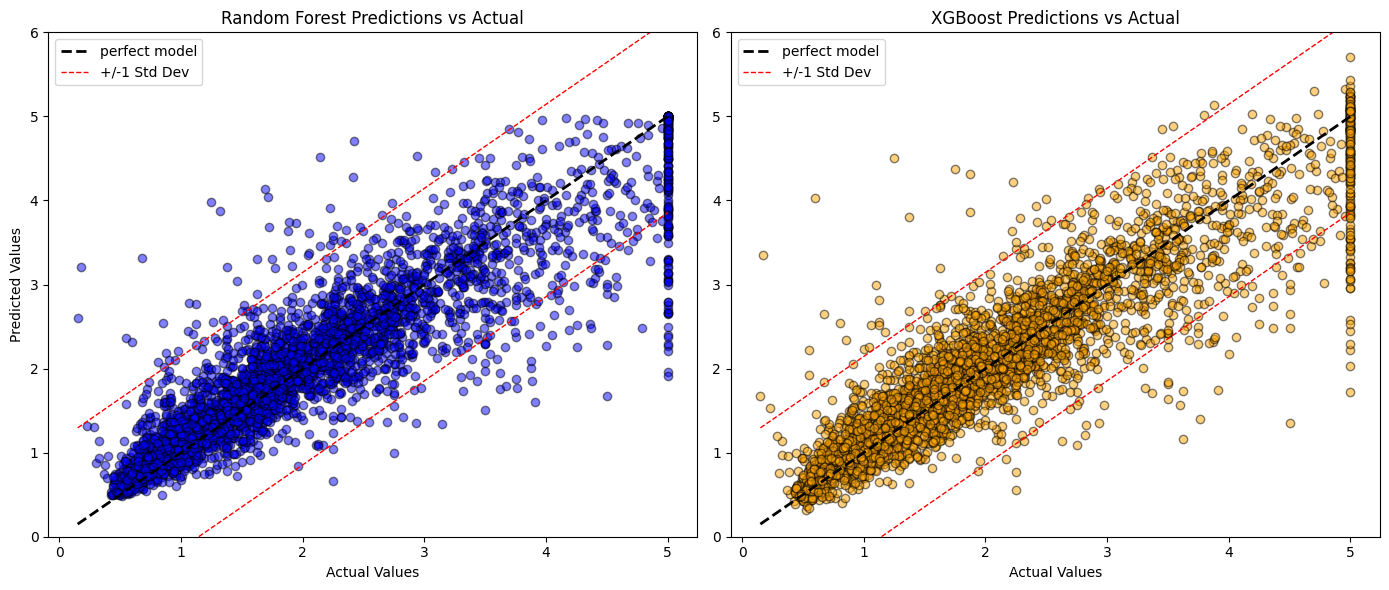

In [20]:
std_y = np.std(y_test)
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_rf, alpha = 0.5, color = 'blue', ec = 'k')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'k--',lw=2,label = 'perfect model' )
plt.plot([y_test.min(),y_test.max()], [y_test.min() +std_y, y_test.max()+std_y], 'r--', lw= 1, label = '+/-1 Std Dev')
plt.plot([y_test.min(),y_test.max()], [y_test.min() -std_y, y_test.max()-std_y],'r--', lw= 1)
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()